In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('carprices.csv')
data.head()

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


In [3]:
data.columns

Index(['Car Model', 'Mileage', 'Sell Price($)', 'Age(yrs)'], dtype='object')

<Axes: xlabel='Age(yrs)', ylabel='Sell Price($)'>

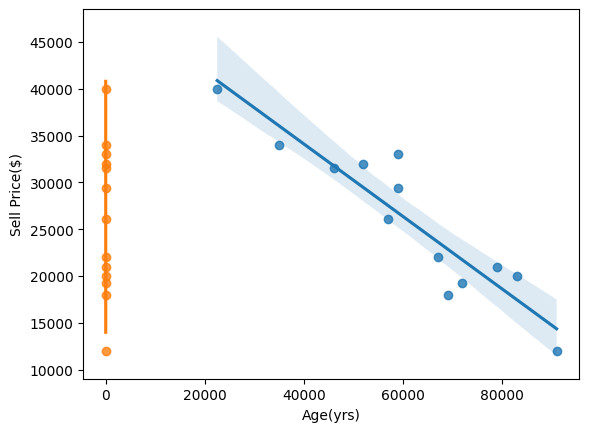

In [4]:
import seaborn as sns   
sns.regplot(data=data , x='Mileage',y='Sell Price($)')
sns.regplot(data = data , x='Age(yrs)',y='Sell Price($)')


In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [6]:
data['Car Model'] = le.fit_transform(data['Car Model'])
data['Car Model'] 

0     1
1     1
2     1
3     1
4     1
5     0
6     0
7     0
8     0
9     2
10    2
11    2
12    2
Name: Car Model, dtype: int64

In [7]:
x = data[['Car Model' , 'Mileage' , 'Age(yrs)']]
x

,Car Model,Mileage,Age(yrs)
0,1,69000,6
1,1,35000,3
2,1,57000,5
3,1,22500,2
4,1,46000,4
5,0,59000,5
6,0,52000,5
7,0,72000,6
8,0,91000,8
9,2,67000,6


In [8]:
y = data['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [9]:
from sklearn.preprocessing import OneHotEncoder

In [10]:
ohe = OneHotEncoder(handle_unknown='ignore')
x1 = ohe.fit_transform(data[['Car Model']])

In [11]:
x1 = pd.DataFrame(x1.toarray())
x1

,0,1,2
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
5,1.0,0.0,0.0
6,1.0,0.0,0.0
7,1.0,0.0,0.0
8,1.0,0.0,0.0
9,0.0,0.0,1.0


In [12]:
x1 = x1.iloc[:,1:]
x1

,1,2
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,0.0
9,0.0,1.0


In [13]:
x = pd.concat([x,x1],axis="columns")
x

,Car Model,Mileage,Age(yrs),1,2
0,1,69000,6,1.0,0.0
1,1,35000,3,1.0,0.0
2,1,57000,5,1.0,0.0
3,1,22500,2,1.0,0.0
4,1,46000,4,1.0,0.0
5,0,59000,5,0.0,0.0
6,0,52000,5,0.0,0.0
7,0,72000,6,0.0,0.0
8,0,91000,8,0.0,0.0
9,2,67000,6,0.0,1.0


In [14]:
x.drop('Car Model',axis=1,inplace=True)
x

,Mileage,Age(yrs),1,2
0,69000,6,1.0,0.0
1,35000,3,1.0,0.0
2,57000,5,1.0,0.0
3,22500,2,1.0,0.0
4,46000,4,1.0,0.0
5,59000,5,0.0,0.0
6,52000,5,0.0,0.0
7,72000,6,0.0,0.0
8,91000,8,0.0,0.0
9,67000,6,0.0,1.0


In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [22]:
x.columns = x.columns.astype(str)


In [24]:
model.fit(x,y)

LinearRegression()

In [26]:
import warnings
warnings.filterwarnings('ignore')

In [27]:
model.predict([[45000,4,0,1]])

array([36991.31721061])

In [28]:
model.predict([[86000,7,1,0]])

array([11080.74313219])

In [29]:
model.score(x,y)

0.9417050937281082

In [30]:
import seaborn as sns 

<Axes: xlabel='Age(yrs)', ylabel='Sell Price($)'>

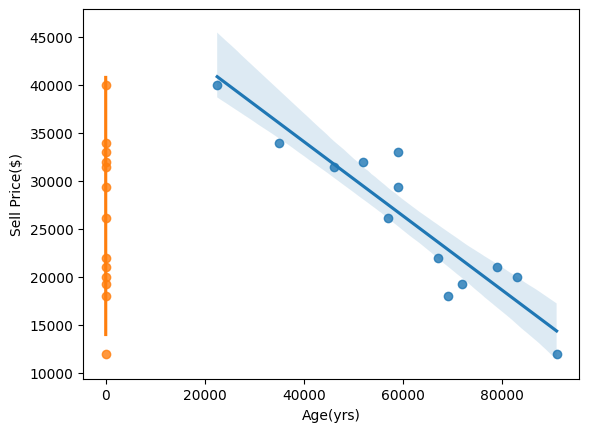

In [31]:
sns.regplot(data=data , x='Mileage',y='Sell Price($)')
sns.regplot(data=data , x='Age(yrs)',y='Sell Price($)')